In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [5]:
data=pd.read_csv("ToyotaCorolla.csv",encoding="latin1")
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [7]:
data1=data.iloc[:,[2,3,6,8,12,13,15,16,17]]
data1.dtypes

Price            int64
Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

In [8]:
data2=data1.rename({"Age_08_04":"age","Quarterly_Tax":"tax","Weight":"weight",'Doors':"door"},axis=1)
data2.head()

,Price,age,KM,HP,cc,door,Gears,tax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [9]:
data2.isnull().sum()

Price     0
age       0
KM        0
HP        0
cc        0
door      0
Gears     0
tax       0
weight    0
dtype: int64

In [10]:
data2.duplicated().value_counts()
data2[data2.duplicated()]

,Price,age,KM,HP,cc,door,Gears,tax,weight
113,24950,8,13253,116,2000,5,5,234,1320


In [11]:
data2.drop_duplicates(inplace=True)

In [12]:
data2.corr()

,Price,age,KM,HP,cc,door,Gears,tax,weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
door,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


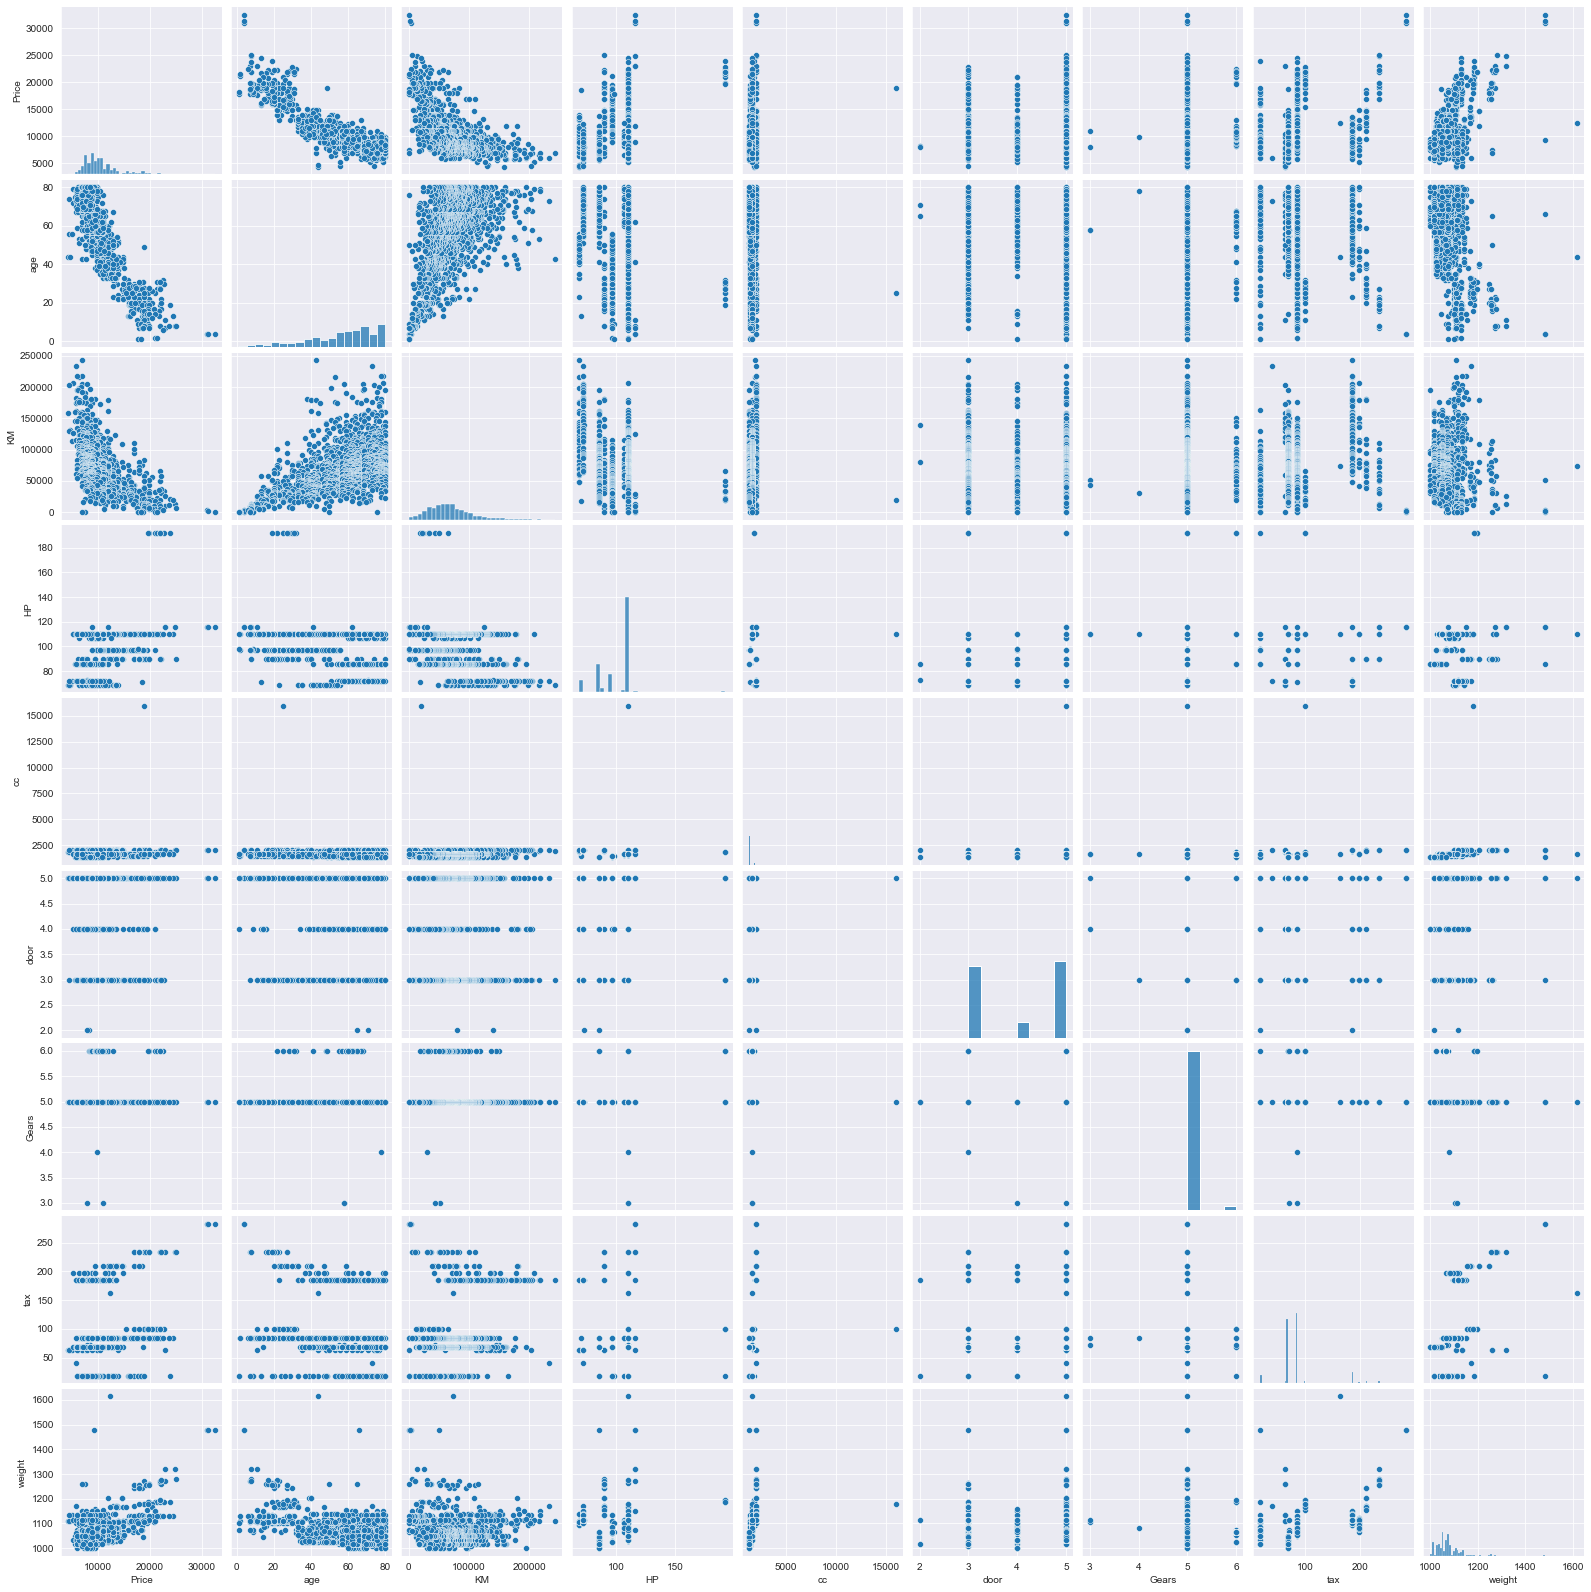

In [13]:
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(data2)

removing gears column as it has very less correlation with Price

In [14]:
data3 = data2.drop("Gears",axis=1)
data3.head()
data3.corr()

,Price,age,KM,HP,cc,door,tax,weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.211508,0.575869
age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.305982,0.335077
door,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,0.107353,0.301734
tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,1.000000,0.621988
weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.621988,1.000000


# Consider only the above columns and prepare a prediction model for predicting Price.

In [15]:
model=smf.ols("Price~age+KM+HP+cc+door+tax+weight",data=data3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1269.
Date:                Sat, 29 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:31:50   Log-Likelihood:                -12371.
No. Observations:                1435   AIC:                         2.476e+04
Df Residuals:                    1427   BIC:                         2.480e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2636.3843   1061.677     -2.483      0.013   -4718.999    -553.770
age         -121.8478      2.622    -46.476      0.000    -126.991    -116.705
KM            -0.0205      0.001    -16.325      0.000      -0.023      -0.018
HP            33.6479      2.742     12.270      0.000      28.269      39.027
cc            -0.1227      0.090     -1.358      0.175      -0.300       0.054
door         -23.9806     39.372     -0.609      0.543    -101.214      53.253
tax            4.0353      1.313      3.073      0.002       1.459       6.611
weight        16.8844      1.072     15.743      0.000      14.781      18.988
==============================================================================
Omnibus:                      149.646   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              980.896
Skew:                          -0.217   Prob(JB):                    1.00e-213
Kurtosis:                       7.027   Cond. No.                     2.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
m1=smf.ols("Price~cc",data=data3).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Sat, 29 Jan 2022   Prob (F-statistic):           2.29e-06
Time:                        21:33:54   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
cc             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
m2=smf.ols('Price~door',data=data3).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Sat, 29 Jan 2022   Prob (F-statistic):           2.40e-12
Time:                        21:34:05   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
door         695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

in cc there so low rsquard value so  drop hole column

In [36]:
data4 = data3.drop("cc",axis=1)
data4.head()

,Price,age,KM,HP,door,tax,weight
0,13500,23,46986,90,3,210,1165
1,13750,23,72937,90,3,210,1165
2,13950,24,41711,90,3,210,1165
3,14950,26,48000,90,3,210,1165
4,13750,30,38500,90,3,210,1170


In [41]:
m3= smf.ols('Price~age+KM+HP+door+tax+weight',data=data4).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1480.
Date:                Sat, 29 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:35:42   Log-Likelihood:                -12372.
No. Observations:                1435   AIC:                         2.476e+04
Df Residuals:                    1428   BIC:                         2.479e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2518.7574   1058.453     -2.380      0.017   -4595.046    -442.468
age         -121.8917      2.622    -46.483      0.000    -127.036    -116.748
KM            -0.0206      0.001    -16.455      0.000      -0.023      -0.018
HP            33.3055      2.731     12.194      0.000      27.947      38.663
door         -23.2523     39.380     -0.590      0.555    -100.502      53.997
tax            3.8184      1.304      2.929      0.003       1.261       6.376
weight        16.6515      1.059     15.724      0.000      14.574      18.729
==============================================================================
Omnibus:                      145.933   Durbin-Watson:                   1.548
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.411
Skew:                          -0.206   Prob(JB):                    2.78e-204
Kurtosis:                       6.938   Cond. No.                     2.33e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# vif calculation

In [42]:
rsq_age=smf.ols('age~KM+HP+door+tax+weight',data=data4).fit().rsquared
vif_age=1/(1-rsq_age)

In [43]:
rsq_KM=smf.ols('KM~age+HP+door+tax+weight',data=data4).fit().rsquared
vif_KM=1/(1-rsq_KM)

In [44]:
rsq_HP=smf.ols('HP~age+KM+door+tax+weight',data=data4).fit().rsquared
vif_HP=1/(1-rsq_HP)

In [45]:
rsq_door=smf.ols('door~age+KM+HP+tax+weight',data=data4).fit().rsquared
vif_door=1/(1-rsq_door)

In [46]:
rsq_tax=smf.ols('tax~age+KM+HP+door+weight',data=data4).fit().rsquared
vif_tax=1/(1-rsq_tax)

In [47]:
rsq_Weight=smf.ols('weight~age+KM+HP+door+tax',data=data4).fit().rsquared
vif_Weight=1/(1-rsq_Weight)

In [48]:
d1 = {'variables':['age','KM','HP','door','tax','weight'],
     'vif':[vif_age,vif_KM,vif_HP,vif_door,vif_tax,vif_Weight]}

In [49]:
vif_frame=pd.DataFrame(d1)
vif_frame

,variables,vif
0,age,1.875416
1,KM,1.738917
2,HP,1.325246
3,door,1.113939
4,tax,2.256997
5,weight,2.423423


# residual analysis for normality

In [50]:
res=m3.resid
res.head(10)

0   -3339.719690
1   -2555.830091
2   -2876.350450
3   -1503.183434
4   -2494.317424
5   -2587.641707
6     195.534750
7    1876.021951
8    1276.335218
9   -1598.873899
dtype: float64

In [52]:
res.mean()

1.042505291384687e-09

C:\Users\Unique Web System\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<function matplotlib.pyplot.show(close=None, block=None)>

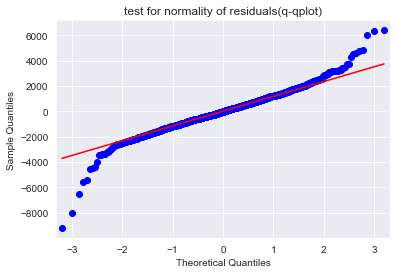

In [53]:
import statsmodels.api as sm
qqplot=sm.qqplot(res,line='q')
plt.title('test for normality of residuals(q-qplot)')
plt.show

C:\Users\Unique Web System\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

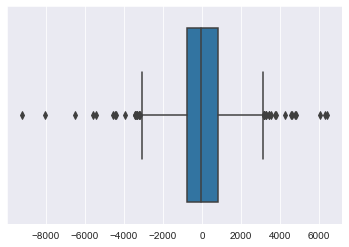

In [57]:
sns.boxplot(m3.resid)

In [56]:
list(np.where(m3.resid<-6000))

[array([220, 600, 959], dtype=int64)]

# residual plot for homoscedasticity

In [31]:
def get_standardized_values(vals):
    return(vals - vals.mean())/vals.std()

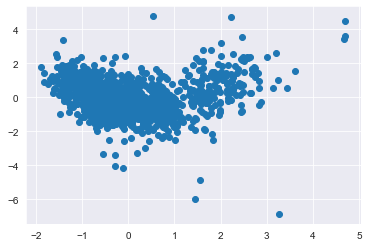

In [58]:
plt.scatter(get_standardized_values(m3.fittedvalues),
           get_standardized_values(m3.resid))

# residual vs regressor

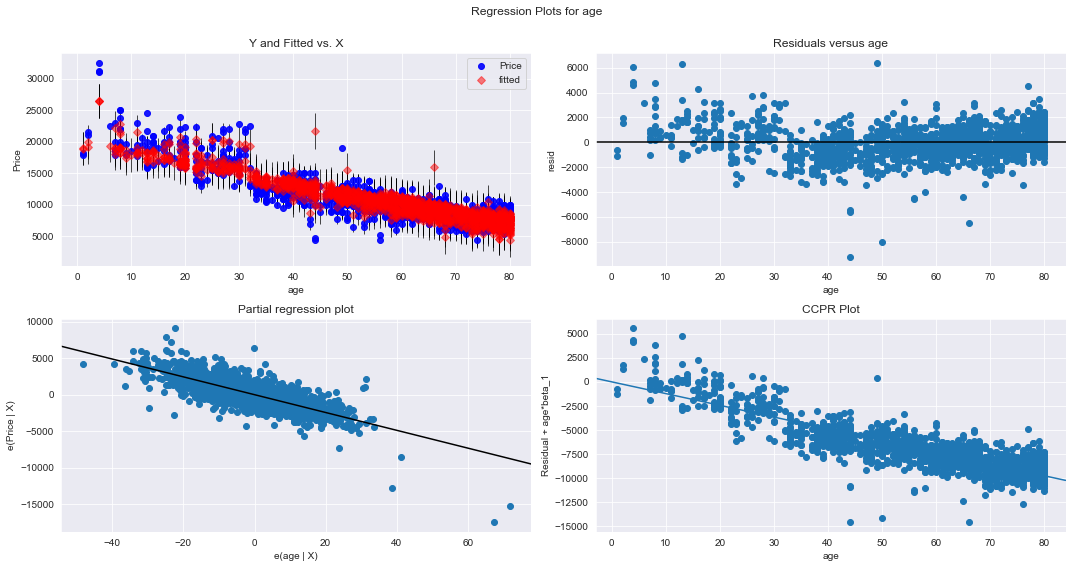

In [59]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(m3,'age',fig=fig)
plt.show()

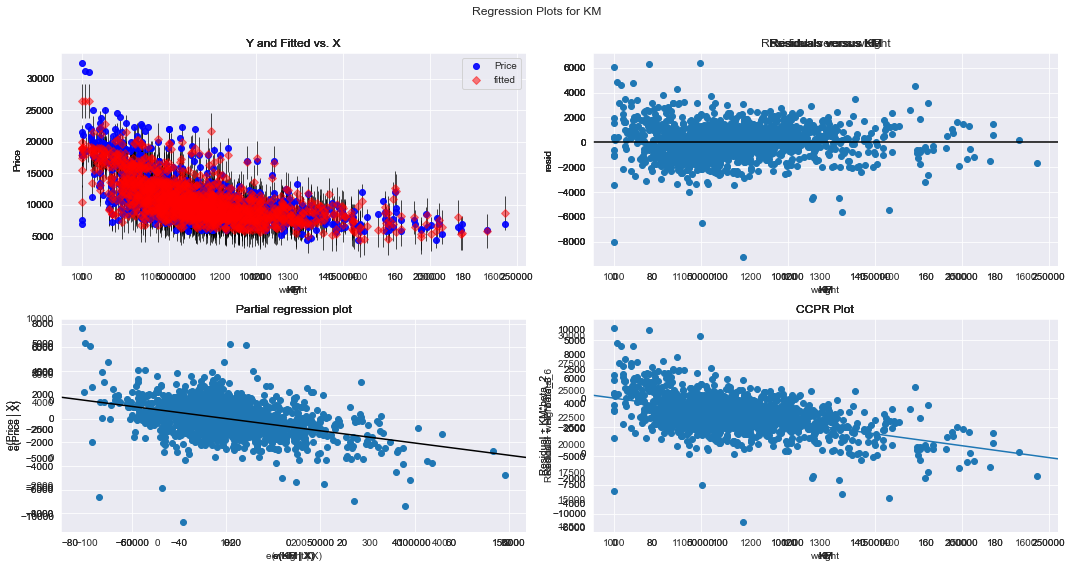

In [64]:
fig = sm.graphics.plot_regress_exog(m3,'KM',fig=fig)
fig

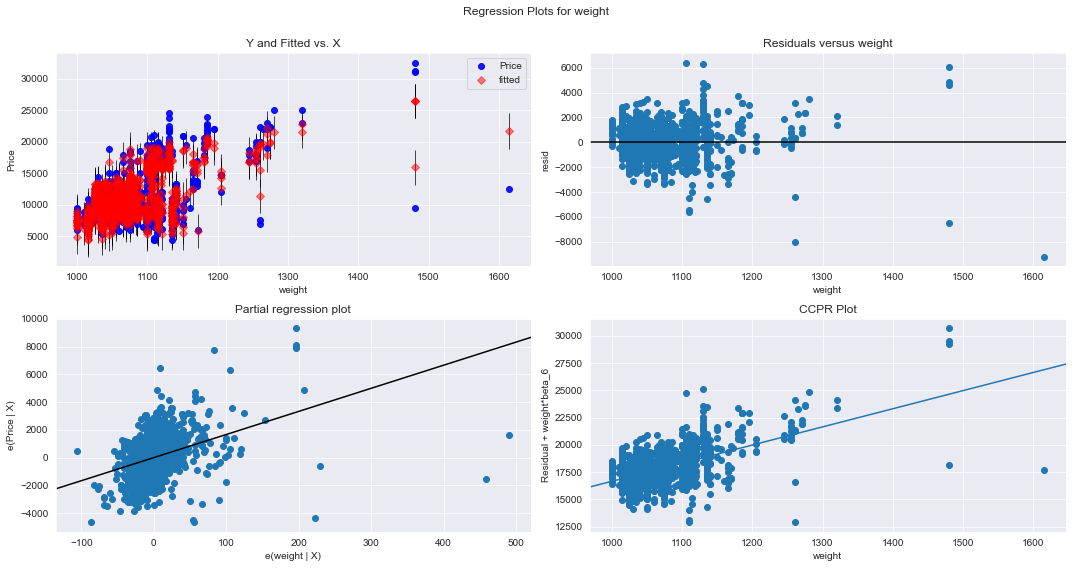

In [60]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(m3,'weight',fig=fig)
plt.show()

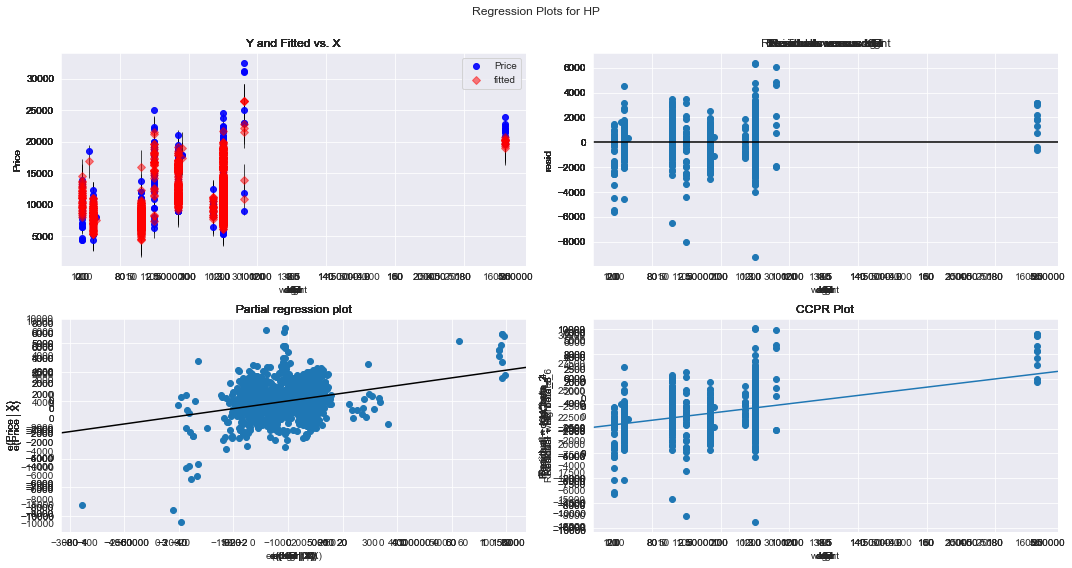

In [70]:
sm.graphics.plot_regress_exog(m3,'HP',fig=fig)

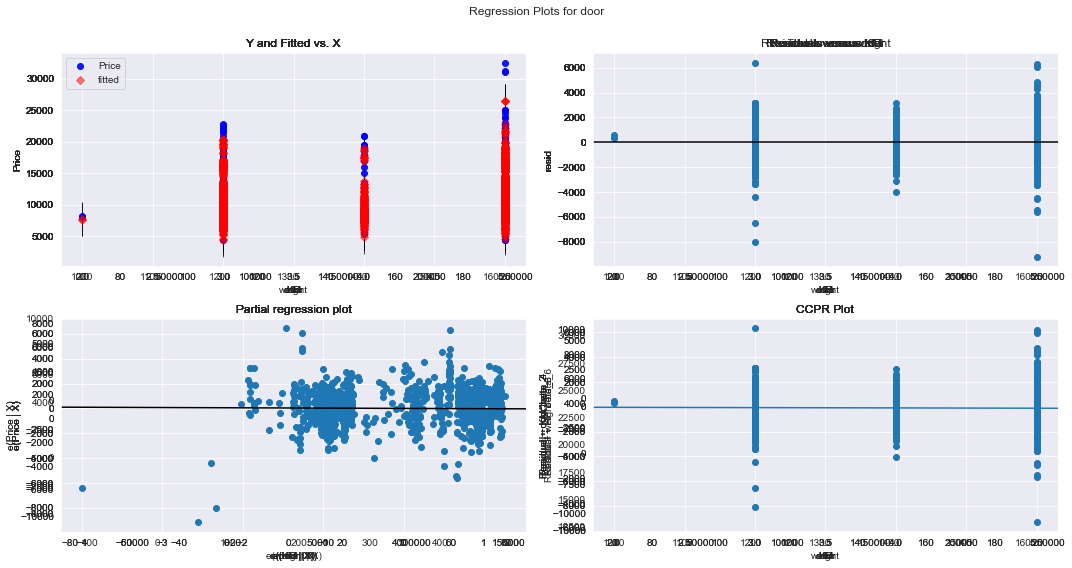

In [67]:
sm.graphics.plot_regress_exog(m3,'door',fig=fig)


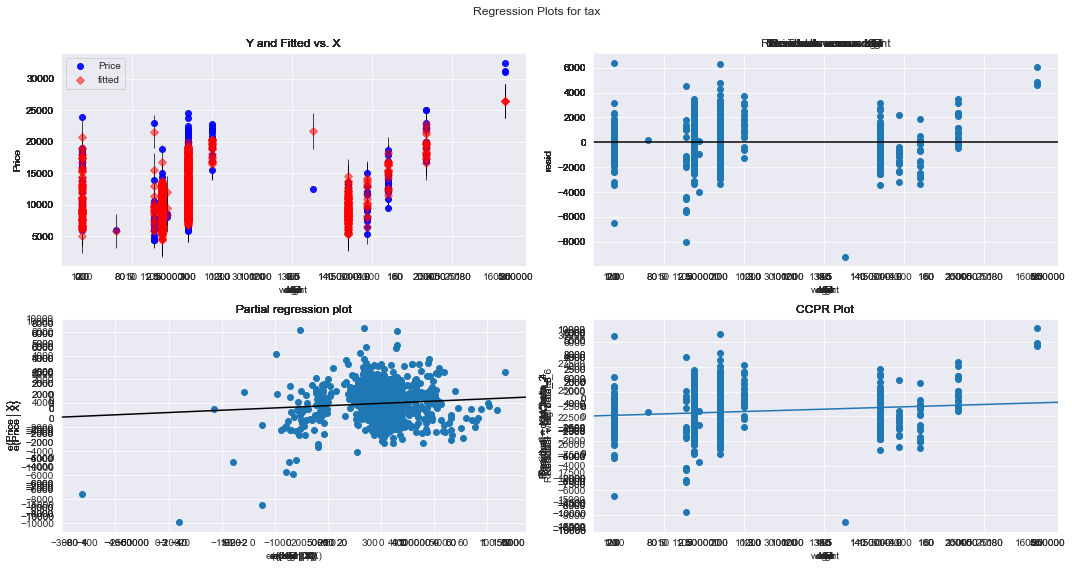

In [69]:
sm.graphics.plot_regress_exog(m3,'tax',fig=fig)

In [71]:
model_influence=m3.get_influence()
(c, _) = model_influence.cooks_distance

Text(0, 0.5, 'cooks distance')

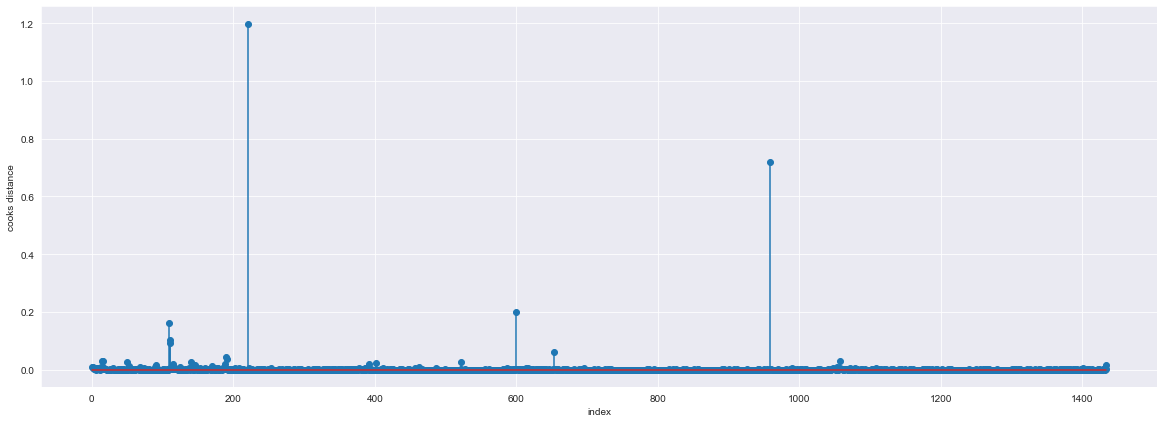

In [72]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data4)),np.round(c,3))
plt.xlabel("index")
plt.ylabel("cooks distance")

In [73]:
np.argmax(c),np.max(c)

(220, 1.1987544668622254)

In [77]:
data_new=data4.drop(data4.index[220],axis=0)
data_new.head()

,Price,age,KM,HP,door,tax,weight
0,13500,23,46986,90,3,210,1165
1,13750,23,72937,90,3,210,1165
2,13950,24,41711,90,3,210,1165
3,14950,26,48000,90,3,210,1165
4,13750,30,38500,90,3,210,1170


In [78]:
m4 = smf.ols("Price~age+KM+HP+door+tax+weight",data=data_new).fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1546.
Date:                Sat, 29 Jan 2022   Prob (F-statistic):               0.00
Time:                        22:37:02   Log-Likelihood:                -12336.
No. Observations:                1434   AIC:                         2.469e+04
Df Residuals:                    1427   BIC:                         2.472e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5450.5835   1109.915     -4.911      0.000   -7627.823   -3273.344
age         -119.1731      2.599    -45.861      0.000    -124.271    -114.076
KM            -0.0208      0.001    -16.937      0.000      -0.023      -0.018
HP            31.5845      2.690     11.741      0.000      26.308      36.861
door         -46.5493     38.767     -1.201      0.230    -122.595      29.497
tax            1.9212      1.304      1.473      0.141      -0.637       4.479
weight        19.6687      1.114     17.648      0.000      17.482      21.855
==============================================================================
Omnibus:                      131.540   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              729.534
Skew:                          -0.206   Prob(JB):                    3.83e-159
Kurtosis:                       6.470   Cond. No.                     2.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

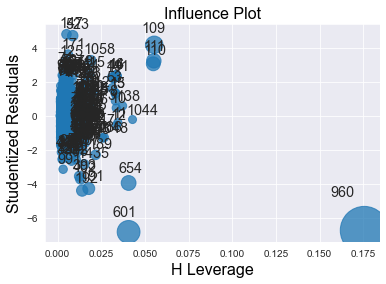

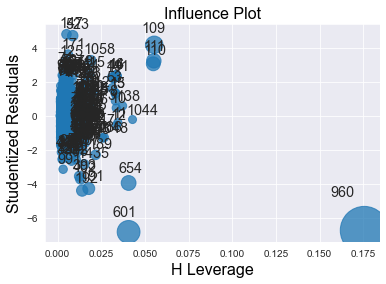

In [79]:
influence_plot(m4)

In [86]:
dataa = data_new.drop(data_new.index[960],axis=0).reset_index()

dataa1 = data_new.drop(data_new.index[958],axis=0).reset_index()

In [87]:
m5 = smf.ols("Price~age+KM+HP+door+tax+weight",data=dataa1).fit()
m5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1602.
Date:                Sat, 29 Jan 2022   Prob (F-statistic):               0.00
Time:                        22:44:55   Log-Likelihood:                -12305.
No. Observations:                1433   AIC:                         2.462e+04
Df Residuals:                    1426   BIC:                         2.466e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8477.4104   1181.676     -7.174      0.000   -1.08e+04   -6159.400
age         -116.1584      2.598    -44.713      0.000    -121.254    -111.062
KM            -0.0211      0.001    -17.446      0.000      -0.023      -0.019
HP            28.3392      2.692     10.525      0.000      23.058      33.621
door         -82.8874     38.556     -2.150      0.032    -158.519      -7.255
tax           -0.8966      1.351     -0.664      0.507      -3.546       1.753
weight        23.0339      1.206     19.103      0.000      20.669      25.399
==============================================================================
Omnibus:                      135.138   Durbin-Watson:                   1.631
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              741.678
Skew:                          -0.235   Prob(JB):                    8.84e-162
Kurtosis:                       6.493   Cond. No.                     2.69e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
dataa1['Predicted'] = m5.fittedvalues
dataa1['Errors'] = dataa1["Price"]-dataa1["Predicted"]
dataa1

,index,Price,age,KM,HP,door,tax,weight,Predicted,Errors
0,0,13500,23,46986,90,3,210,1165,16807.692483,-3307.692483
1,1,13750,23,72937,90,3,210,1165,16260.176738,-2510.176738
2,2,13950,24,41711,90,3,210,1165,16802.826307,-2852.826307
3,3,14950,26,48000,90,3,210,1165,16437.823729,-1487.823729
4,4,13750,30,38500,90,3,210,1170,16288.791032,-2538.791032
...,...,...,...,...,...,...,...,...,...,...
1428,1431,7500,69,20544,86,3,69,1025,8810.603810,-1310.603810
1429,1432,10845,72,19000,86,3,69,1015,8264.364896,2580.635104
1430,1433,8500,71,17016,86,3,69,1015,8422.381886,77.618114
1431,1434,7250,70,16916,86,3,69,1015,8540.650133,-1290.650133
